In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

from numpy import sin
from numpy import arange

В качестве исследуемой функции выберем функцию с несколькими
экстремумами `f(x) = sin((20 / 7) * x)+sin(x)`



In [18]:
def f(x):
    return sin((20 / 7) * x)+sin(x)

Введем следующие константы:


*   `r_min, r_max` - концы исследуемого промежутка
*   `eps` - точность поиска
*   `max_iterations` - максимальное количество итераций при проведении поиска



In [19]:
r_min, r_max = -3, 9.5
eps = 0.00001
max_iterations = 1000

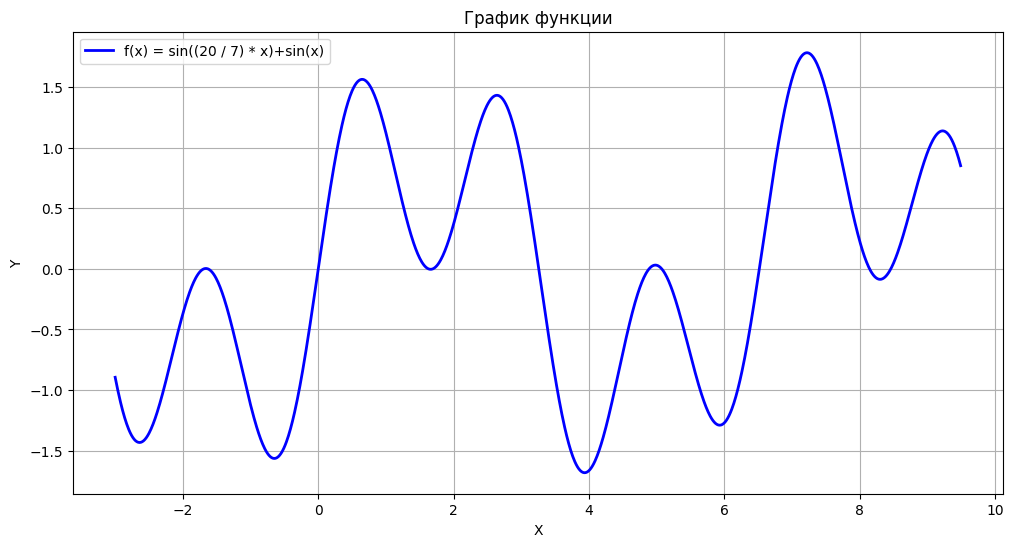

In [22]:
x = arange(r_min, r_max, 0.01)
y = f(x)

plt.figure(figsize=(12,6))
plt.title('График функции')
plt.plot(x,y,label ='f(x) = sin((20 / 7) * x)+sin(x)',linewidth=2, color= 'blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend(loc='best')
plt.show()

Константа Липшица


In [23]:
def lipschitz_const(x: np.array, fun = f) -> float:

    u = x[0]
    lip_const = -1
    w_u = fun(u)
    for i in x[1:]:
        v = i
        w_v = fun(v)
        temp_lip_const = abs(w_u - w_v) / abs(u - v)
        lip_const = max(lip_const, temp_lip_const)
    return lip_const

In [24]:
lip_const = lipschitz_const(x)
lip_const

2.8367284227727767

Для отображение ломанной линиий миноранты введем функцию:

In [25]:
def g_k(x, k, fun=f):
    """ k  итерация ломаной"""
    g = fun(k) - lip_const * np.abs(x-k)
    return g

In [26]:
def piyavski_method(function,a=r_min, b=r_max, k=max_iterations):
    """
    Метод пиявского
    Возвращает функцию bl, и координаты точки минимума
    """
    g_0 = g_k(x, a, fun=function)
    g_1 = g_k(x, b, fun=function)
    bl = np.maximum(g_0, g_1)
    x_min = x[np.nanargmin(bl)]

    for i in range(k):
        x_min = x[np.nanargmin(bl)]
        y_min = min(bl)
        f_min = function(x_min)

        if eps >= abs(function(x_min)-y_min):
            print('Минимум найден за:',i,'итераций из',k)
            break

        g = g_k(x, x_min,fun=function)
        bl = np.maximum(g, bl)
    return bl, x_min, y_min


bl, x_min, y_min = piyavski_method(f)

Минимум найден за: 35 итераций из 1000


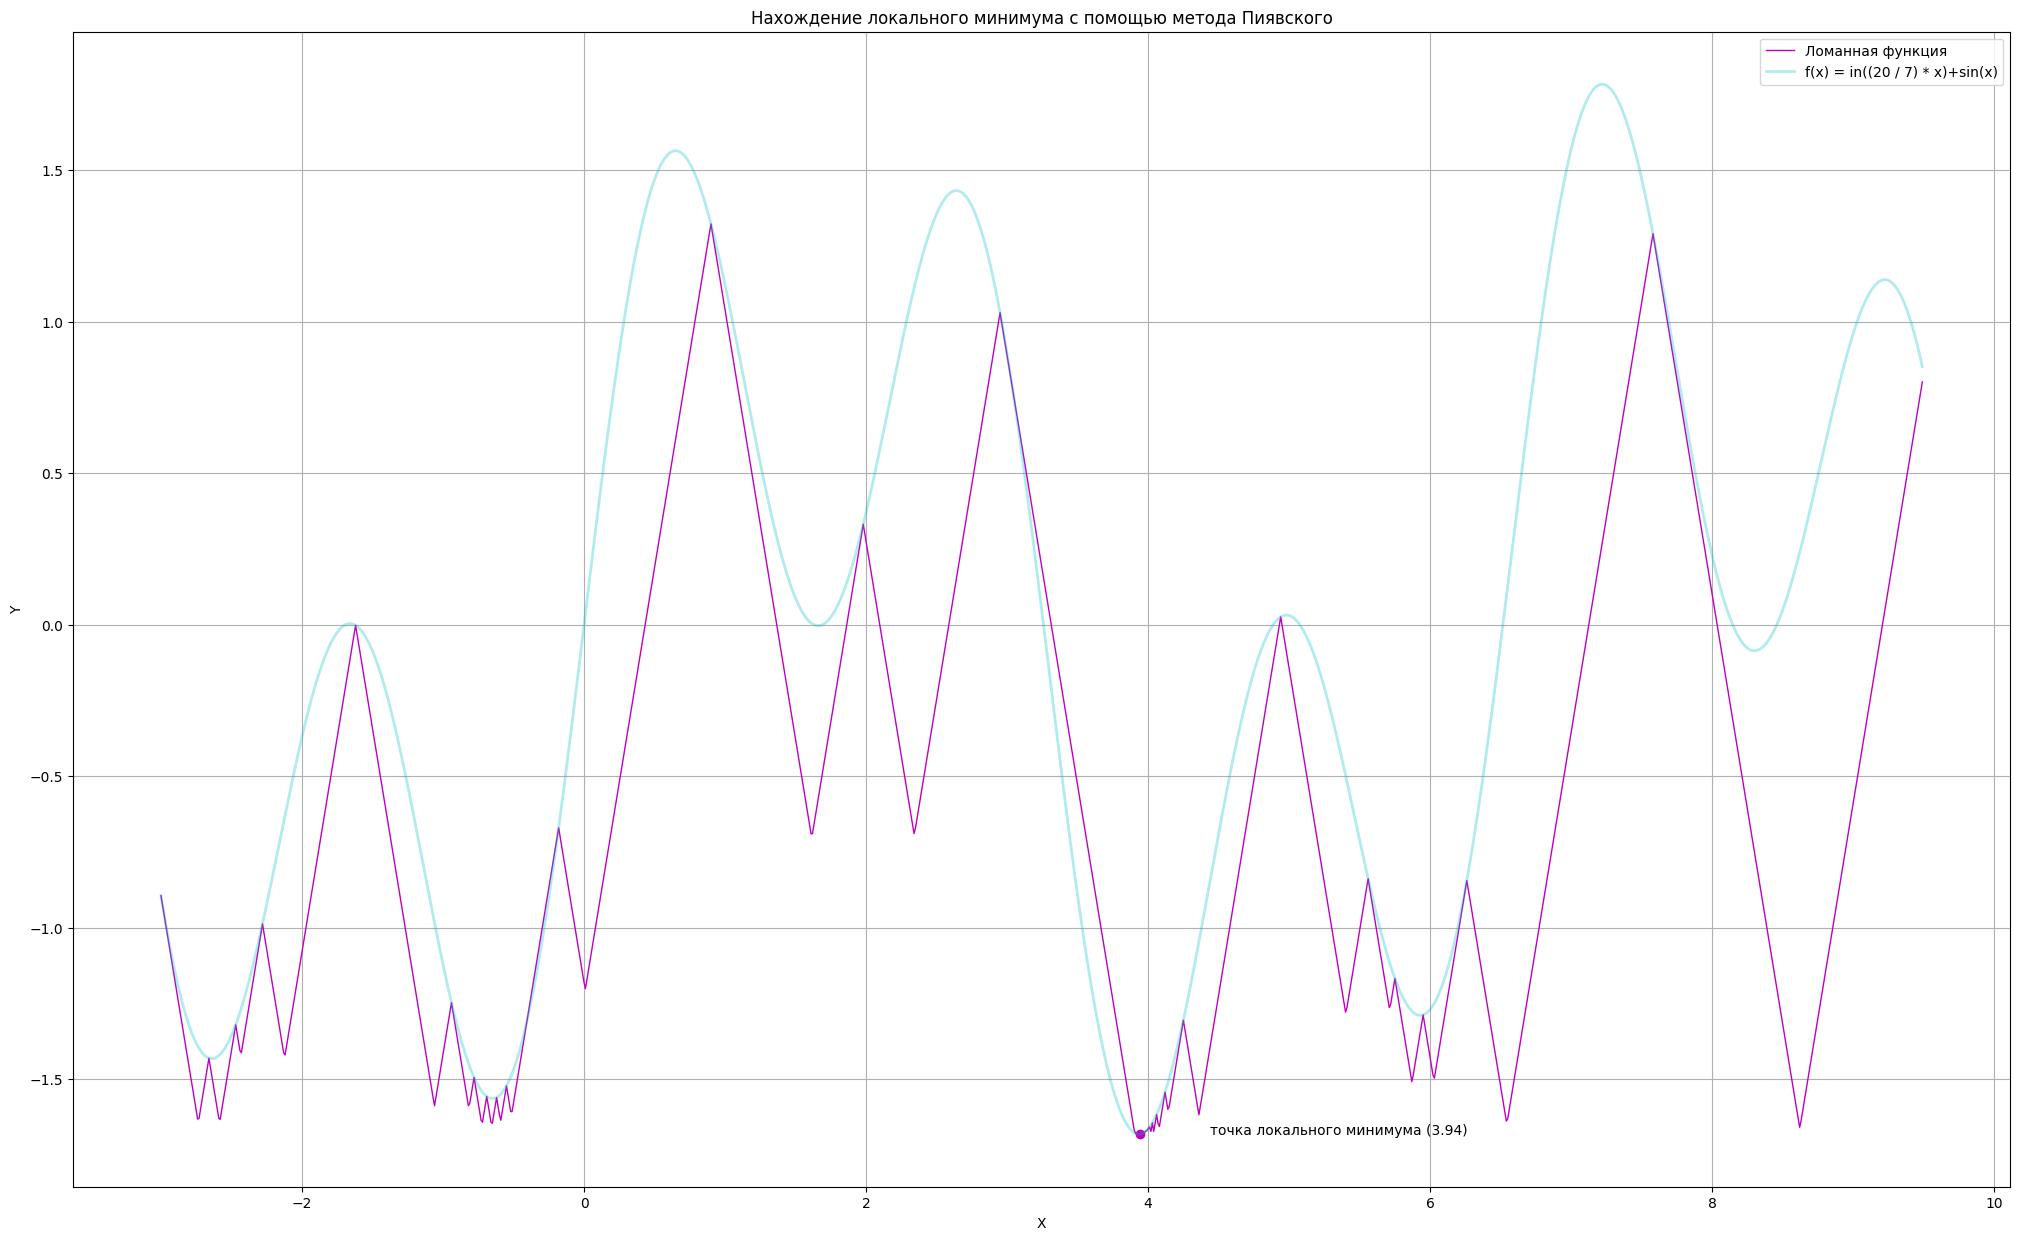

In [28]:
plt.figure(figsize=(25,15))
plt.title('Нахождение локального минимума с помощью метода Пиявского')
plt.plot(x, bl,
         label =r'Ломанная функция',
         linewidth=1,
         color='m')

plt.plot(x, y,
         label=r'f(x) = in((20 / 7) * x)+sin(x)',
         linewidth=2,
         color='c',
         alpha=0.3)

plt.scatter(x_min, y_min, marker = 'o', color = 'm')

plt.annotate(f"точка локального минимума ({round(x_min,4)})", (x_min,y_min),
             xycoords='data',
             xytext=(x_min+0.5,y_min))

plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend(loc='best')
plt.show()